In [1]:
import keras as k
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv" , low_memory=False)

In [3]:
df.drop(['TelephonyManager.getSimCountryIso'], axis=1, inplace=True)

In [4]:
df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [5]:
len(df)

15036

In [6]:
x = []
for i in range(len(df)):
    x.append(list((df.iloc[i]))[:-1])

In [7]:
x = np.array(x[:-3916]).astype('int16')

In [8]:
x.shape

(11120, 214)

In [9]:
y=[]
for i in df['class']:
    if i=='S':
        y.append([0])
    else:
        y.append([1])

In [10]:
y = np.array(y[:-3916])

In [11]:
y.shape, y[:4]

((11120, 1),
 array([[0],
        [0],
        [0],
        [0]]))

In [12]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [13]:
model = k.models.Sequential()

model.add(k.layers.Dense(40, input_shape=(214,), activation='relu'))
model.add(k.layers.Dense(20, activation='relu'))
model.add(k.layers.Dense(2, activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [15]:
model.fit(x_train,y_train, shuffle=True, epochs=5, batch_size=32,  validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1672 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.0842 - val_sparse_categorical_accuracy: 0.9730
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9766
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9820 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9784
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0557 - val_sparse_categorical_accuracy: 0.9775


In [61]:
i = 10
a = x_test[i].reshape(1,214)
b = y_test[i]
b

array([0])

In [64]:
model.predict([a,][0])

array([0])

In [18]:
df.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,...,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000
mean,0.426443,0.446595,0.442671,0.413208,0.444932,0.486898,0.236632,0.330806,0.282389,0.312583,...,0.007050,0.233307,0.017425,0.004256,0.434424,0.666135,0.290835,0.016028,0.007050,0.044959
std,0.494576,0.497156,0.496719,0.492426,0.496975,0.499845,0.425029,0.470519,0.450177,0.463561,...,0.083669,0.422950,0.130852,0.065105,0.495698,0.471608,0.454163,0.125588,0.083669,0.207220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
import matplotlib.pyplot as plt

In [21]:
m = ExtraTreesClassifier()
m.fit(x,y.ravel())

ExtraTreesClassifier()

In [22]:
print(m.feature_importances_)

[4.49909012e-02 3.38282820e-02 3.61740518e-02 5.18128819e-02
 3.09267477e-02 2.44058181e-02 7.80957773e-02 2.19050229e-02
 9.66372911e-03 2.07098927e-02 1.28728556e-02 1.28721267e-02
 3.22798798e-02 3.50875689e-02 3.88246342e-03 1.72548004e-02
 1.47067596e-02 1.70276788e-02 1.23313533e-02 9.23957316e-03
 1.87405932e-02 7.26285641e-03 1.57467465e-02 3.18965065e-03
 5.44563617e-03 1.55620435e-02 3.97821394e-03 3.92989470e-03
 7.68410675e-03 6.63025065e-03 1.96438368e-02 1.24773420e-03
 5.59775623e-03 2.05055843e-03 5.52013662e-03 4.82183410e-03
 3.28130176e-03 4.21356866e-03 4.54505302e-03 3.24119860e-03
 1.67070448e-03 7.27958088e-03 1.06121946e-02 1.13783287e-02
 4.24156790e-03 2.50111280e-03 4.34932083e-03 1.98093100e-03
 4.69198681e-03 2.87843157e-03 7.11127792e-03 4.57135159e-03
 2.75073142e-02 1.73107112e-03 3.11721687e-03 1.28480906e-03
 1.77586642e-03 2.79667525e-03 2.17545654e-03 1.84687494e-03
 8.43880521e-04 3.73648237e-03 1.30576747e-03 1.62242745e-03
 3.39658636e-03 6.950255

In [23]:
df1=df

In [24]:
df1.drop(['class'], axis=1, inplace=True)

In [25]:
feature_import = pd.Series(m.feature_importances_, index=df1.columns)

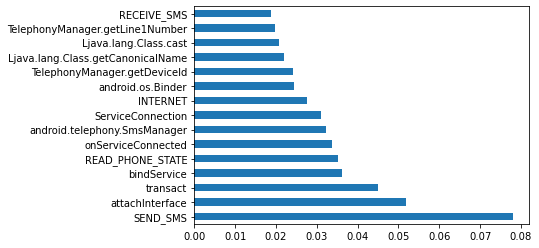

In [66]:
feature_import.nlargest(15).plot(kind='barh')
plt.show()

Feature: 0, Score: 0.03275
Feature: 1, Score: 0.03624
Feature: 2, Score: 0.04253
Feature: 3, Score: 0.04860
Feature: 4, Score: 0.03242
Feature: 5, Score: 0.03145
Feature: 6, Score: 0.05496
Feature: 7, Score: 0.02811
Feature: 8, Score: 0.01450
Feature: 9, Score: 0.01238
Feature: 10, Score: 0.02417
Feature: 11, Score: 0.01953
Feature: 12, Score: 0.03393
Feature: 13, Score: 0.05077
Feature: 14, Score: 0.00542
Feature: 15, Score: 0.00877
Feature: 16, Score: 0.00944
Feature: 17, Score: 0.01061
Feature: 18, Score: 0.01138
Feature: 19, Score: 0.00989
Feature: 20, Score: 0.01536
Feature: 21, Score: 0.01064
Feature: 22, Score: 0.01316
Feature: 23, Score: 0.00261
Feature: 24, Score: 0.00687
Feature: 25, Score: 0.01575
Feature: 26, Score: 0.00495
Feature: 27, Score: 0.00390
Feature: 28, Score: 0.00879
Feature: 29, Score: 0.00425
Feature: 30, Score: 0.01666
Feature: 31, Score: 0.00251
Feature: 32, Score: 0.00706
Feature: 33, Score: 0.00349
Feature: 34, Score: 0.00762
Feature: 35, Score: 0.00501
Fe

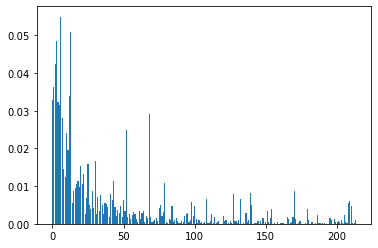

In [27]:
model = ExtraTreesClassifier()
model.fit(x, y.ravel())
imp_feature=[]
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if v>0.01:
        imp_feature.append(i)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [28]:
print(imp_feature)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 20, 21, 22, 25, 30, 43, 52, 68, 79]


In [29]:
import seaborn as sb

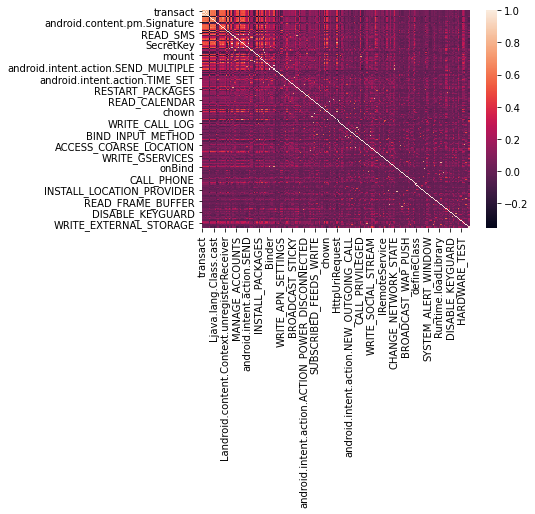

In [30]:
corr = df1.corr()

dataplot = sb.heatmap(corr)

In [31]:
title_options=['transact','onServiceConnected', 'bindService','attachInterface','ServiceConnection','android.os.Binder',
              'SEND_SMS','Ljava.lang.Class.getCanonicalName','Ljava.lang.Class.getMethods','Ljava.lang.Class.cast',
              'Ljava.net.URLDecoder','android.content.pm.Signature','android.telephony.SmsManager','READ_PHONE_STATE',
              'ClassLoader','Landroid.content.Context.registerReceiver','Ljava.lang.Class.getField',
               'Landroid.content.Context.unregisterReceiver','GET_ACCOUNTS','RECEIVE_SMS','READ_SMS',
              'android.intent.action.BOOT_COMPLETED','TelephonyManager.getLine1Number','TelephonyManager.getSubscriberId',
              'INTERNET','TelephonyManager.getDeviceId','chmod']

In [32]:
new_df = df[['transact','onServiceConnected', 'bindService','attachInterface','ServiceConnection','android.os.Binder',
              'SEND_SMS','Ljava.lang.Class.getCanonicalName','Ljava.lang.Class.getMethods','Ljava.lang.Class.cast',
              'Ljava.net.URLDecoder','android.content.pm.Signature','android.telephony.SmsManager','READ_PHONE_STATE',
              'ClassLoader','Landroid.content.Context.registerReceiver','Ljava.lang.Class.getField',
               'Landroid.content.Context.unregisterReceiver','GET_ACCOUNTS','RECEIVE_SMS','READ_SMS',
              'android.intent.action.BOOT_COMPLETED','TelephonyManager.getLine1Number','TelephonyManager.getSubscriberId',
              'INTERNET','TelephonyManager.getDeviceId','chmod']]

In [33]:
new_df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,android.intent.action.BOOT_COMPLETED,TelephonyManager.getLine1Number,TelephonyManager.getSubscriberId,INTERNET,TelephonyManager.getDeviceId,chmod
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,1,1,0
15032,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,0,0,0,1,1,0


In [34]:
new_x = []
for i in range(len(new_df)):
    new_x.append(list((new_df.iloc[i])))

In [35]:
new_x = np.array(new_x[:-3916]).astype('int16')

In [36]:
new_x.shape

(11120, 27)

In [37]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, y, test_size=0.1, random_state=42)

In [38]:
new_model = k.models.Sequential()

new_model.add(k.layers.Dense(20, input_shape=(27,), activation='relu'))
new_model.add(k.layers.Dense(10, activation='relu'))
new_model.add(k.layers.Dense(2, activation='softmax'))

In [39]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [40]:
new_model.fit(new_x_train,new_y_train, shuffle=True, epochs=5, batch_size=32,  validation_data=(new_x_test, new_y_test))

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.1795 - val_sparse_categorical_accuracy: 0.9326
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1691 - sparse_categorical_accuracy: 0.9369 - val_loss: 0.1510 - val_sparse_categorical_accuracy: 0.9388
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1530 - sparse_categorical_accuracy: 0.9428 - val_loss: 0.1398 - val_sparse_categorical_accuracy: 0.9460
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1441 - sparse_categorical_accuracy: 0.9465 - val_loss: 0.1324 - val_sparse_categorical_accuracy: 0.9460
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1374 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.1271 - val_sparse_categorical_accuracy: 0.9496
